In [1]:
interp.repositories() ++= Seq(
  coursierapi.MavenRepository.of("https://dl.bintray.com/cibotech/public"),
  coursierapi.MavenRepository.of("https://dl.bintray.com/rainier/maven"),
  coursierapi.MavenRepository.of("https://jitpack.io/")
)

In [ ]:
import $ivy.`com.stripe::rainier-core:0.3.1a1`
import $ivy.`com.stripe::rainier-notebook:0.3.1a1`

In [ ]:
import com.stripe.rainier.compute._
import com.stripe.rainier.core._
import com.stripe.rainier.sampler._
import com.stripe.rainier.notebook._

In [ ]:
def load(path: String) = loadCSV(path).map(_("Close").toDouble)

val dji = load("data/dji.csv")
val sp500 = load("data/sp500.csv")
val vix = load("data/vix.csv")


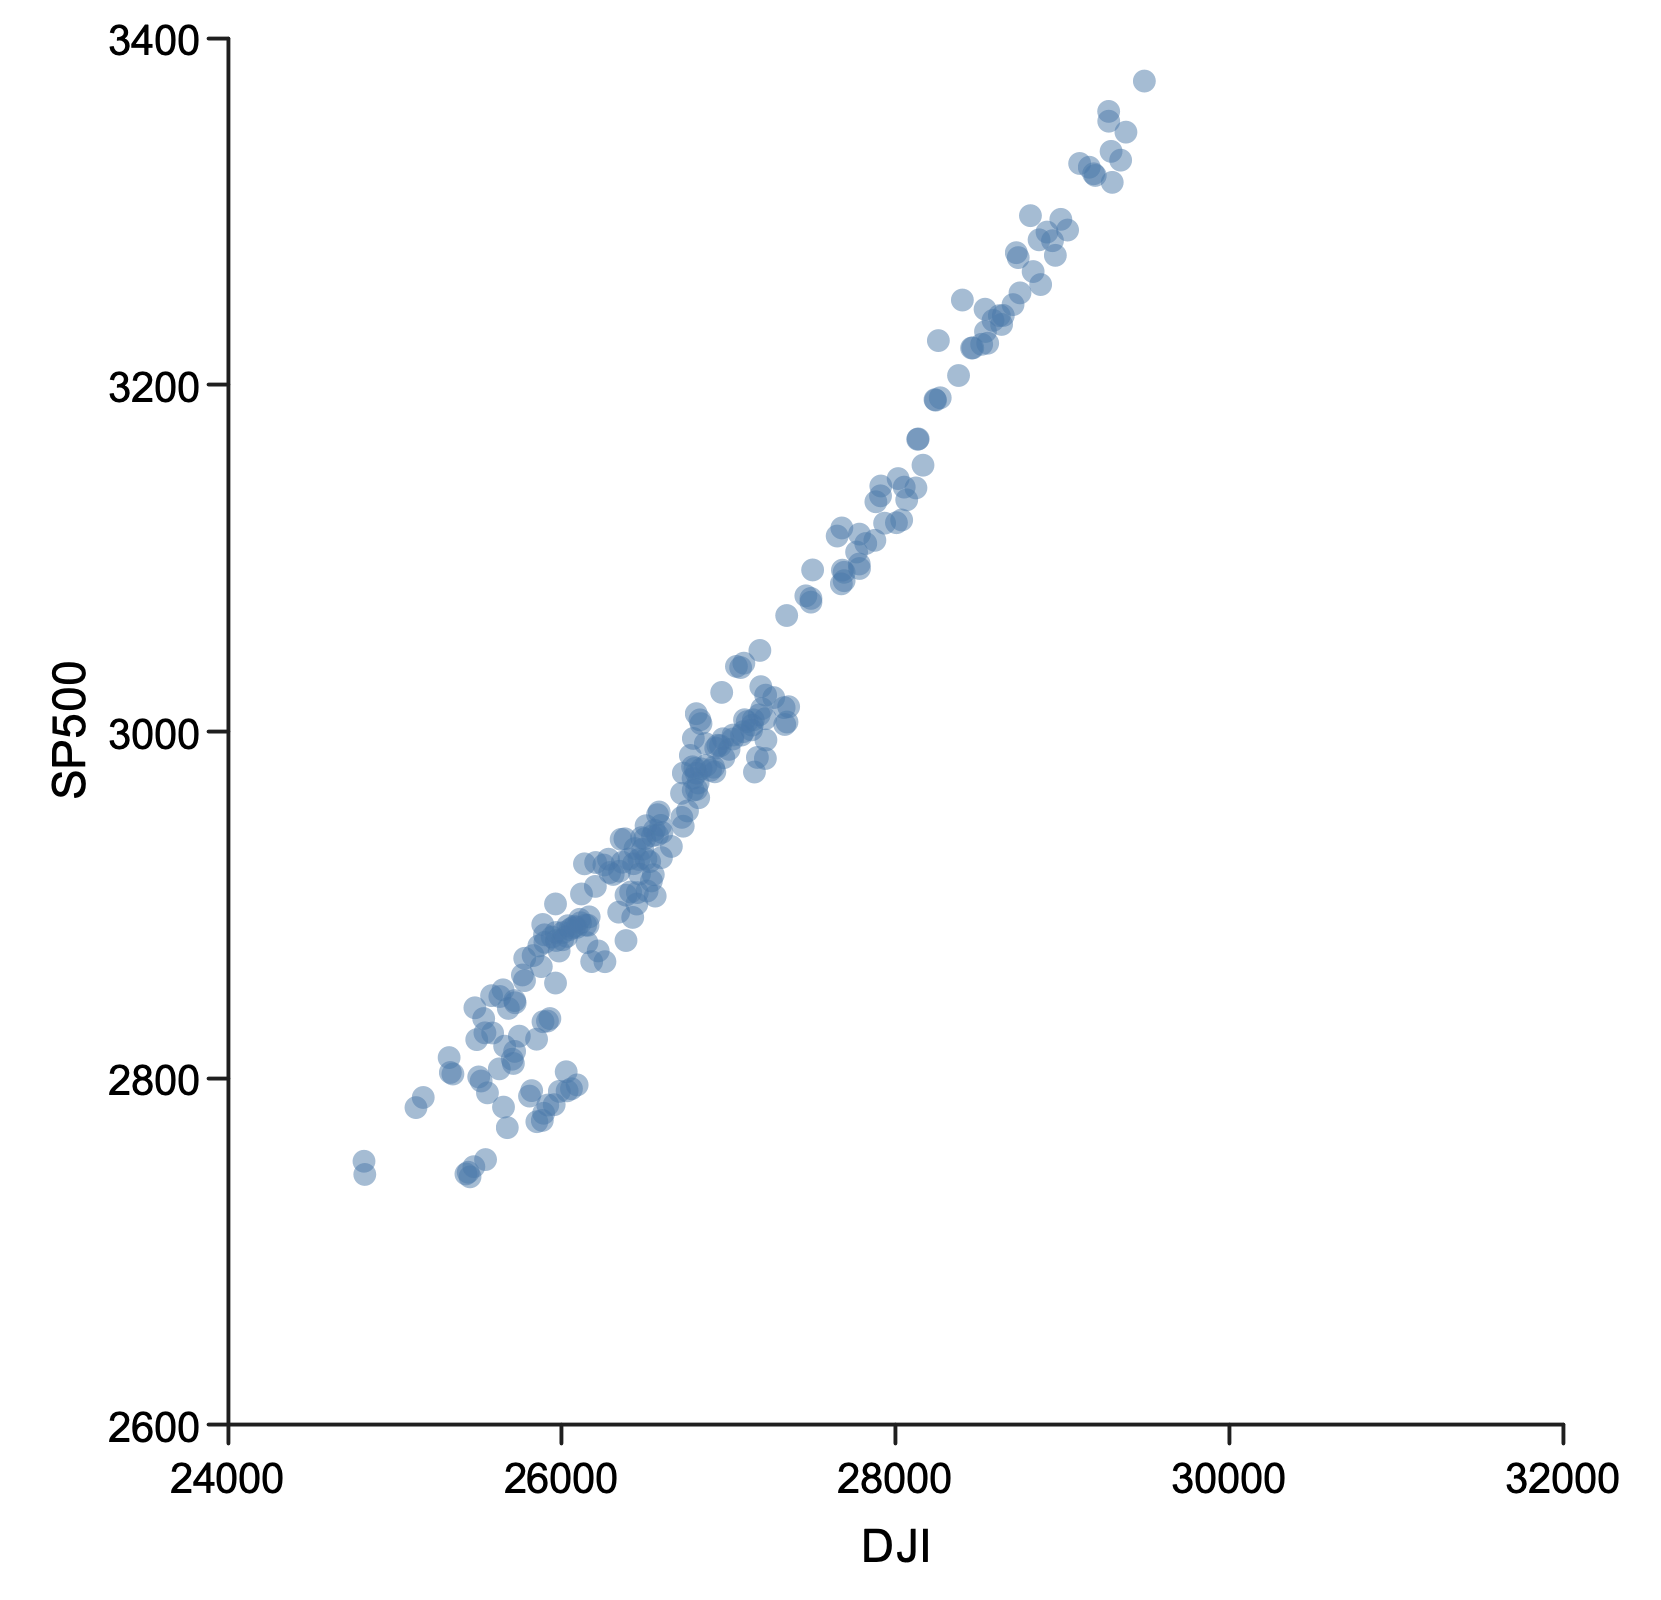

In [18]:
show("DJI", "SP500", scatter(dji.zip(sp500)))

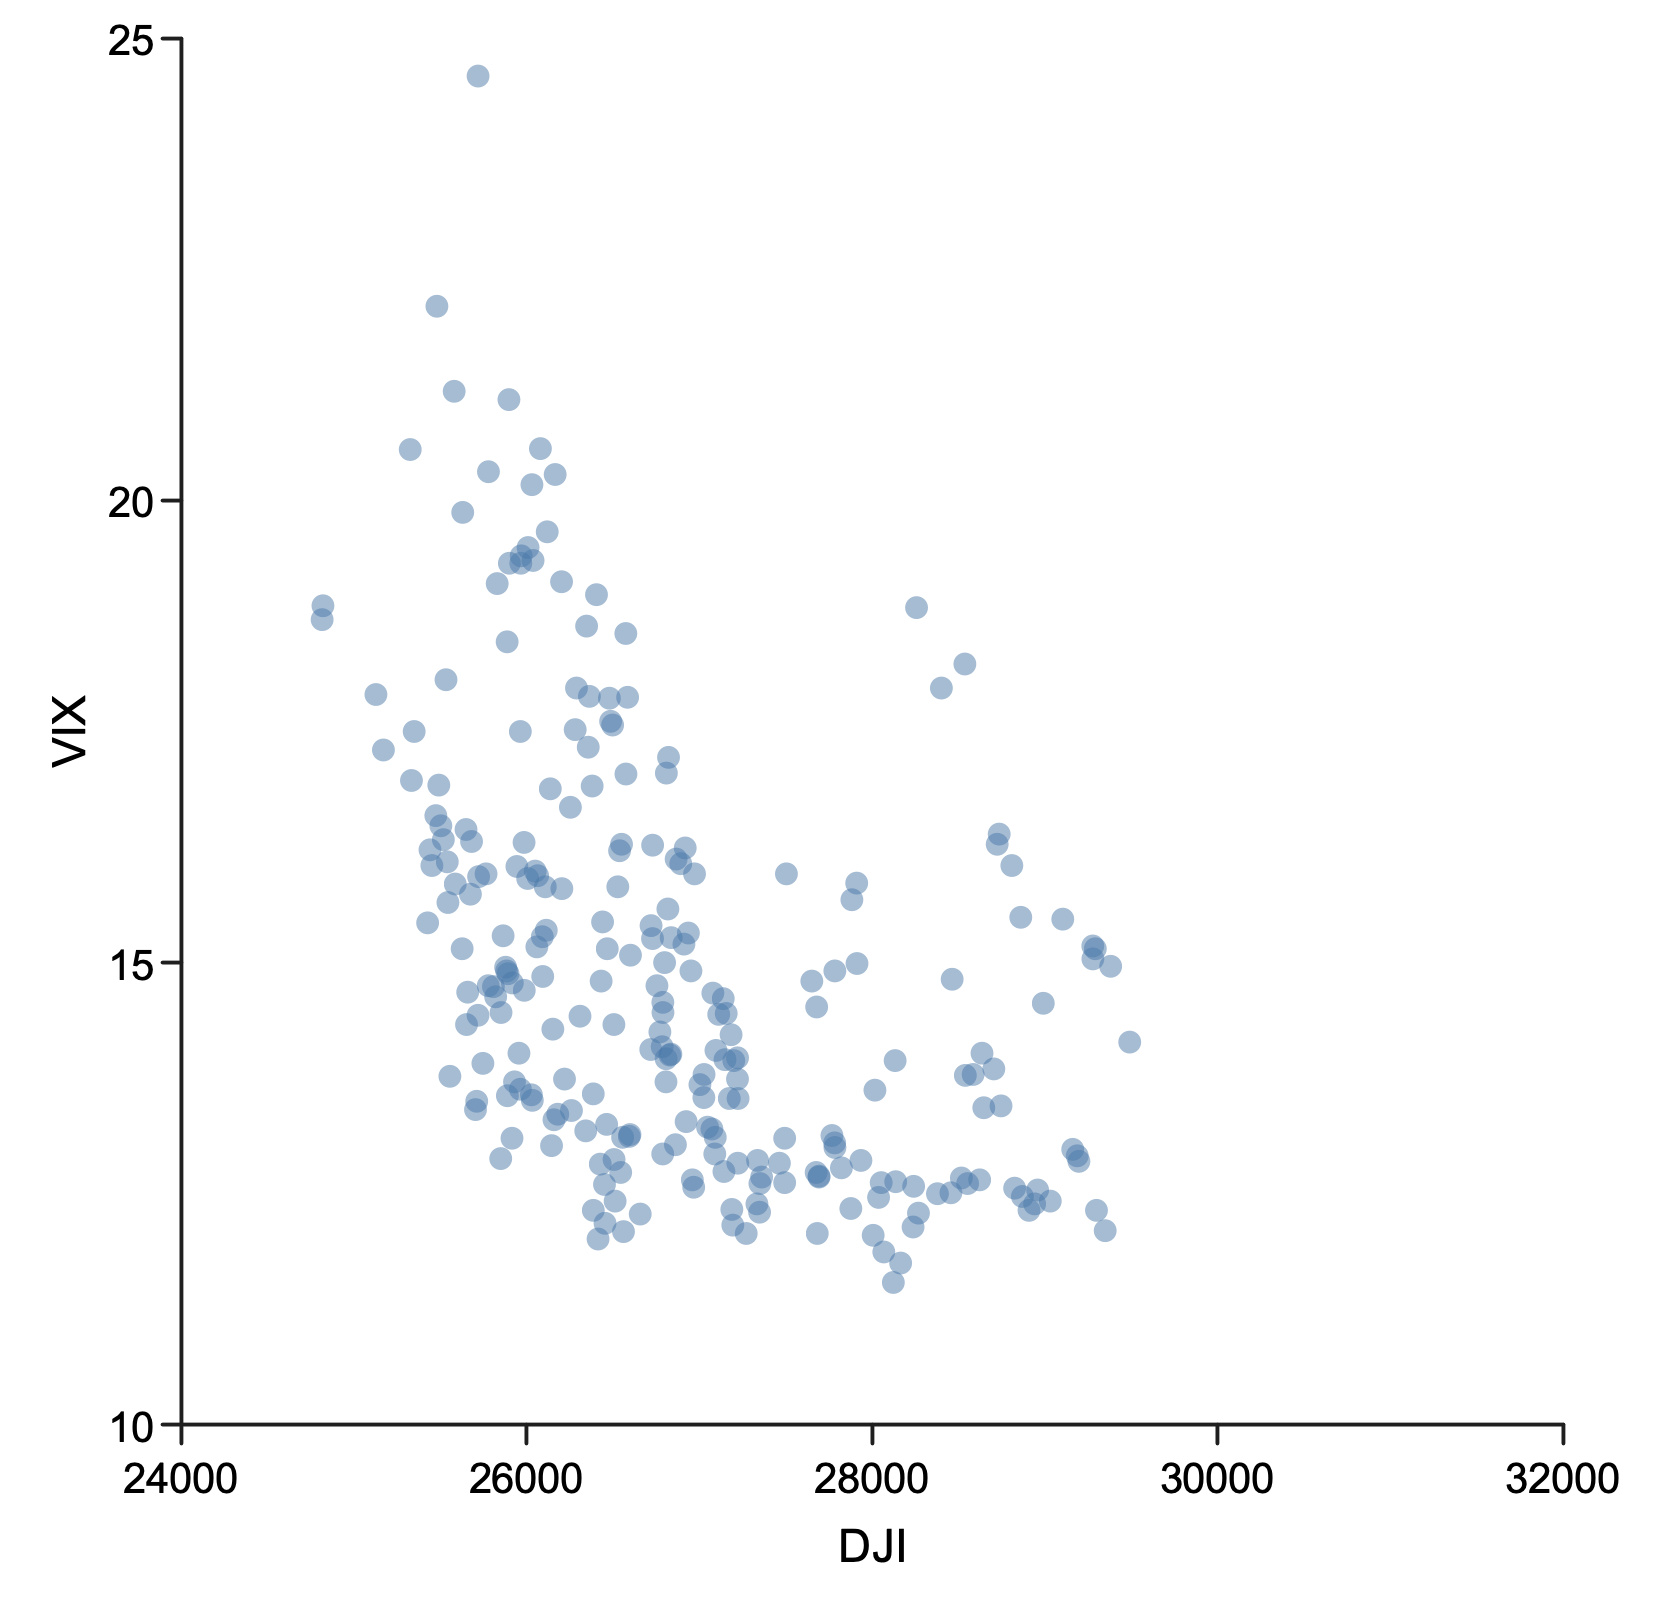

In [16]:

show("DJI", "VIX", scatter(dji.zip(vix)))

In [ ]:
val n = 3
val means = LogNormal(0,1).latentVec(n)
val stdDevs = Exponential(1).latentVec(n)
val corr = LKJCorrelation(1, n).latent

val data = dji.zip(sp500).zip(vix).map{case ((d,s),v) => Vector(d,s,v)}
val model = Model.observe(data, MVNormal(means, stdDevs, corr))

In [ ]:
//too slow
//val trace = model.sample(HMC(100000, 1000, 5))